<a href="https://colab.research.google.com/github/joshIsac/sem-2-lab-/blob/main/2348523_LAB_4_POLYNOMIAL_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [446]:
data=pd.read_csv('/content/drive/MyDrive/Program_4_Dataset.csv')
data.head


<bound method NDFrame.head of       index  OS_Time_Stamp  Temperature  Pressure  Humidity  \
0         0     1456761674         17.7    1015.2      76.4   
1         1     1456761733         17.7    1015.3      76.4   
2         2     1456761792         17.7    1015.3      76.5   
3         3     1456761853         17.7    1015.3      76.7   
4         4     1456761912         17.6    1015.2      76.8   
...     ...            ...          ...       ...       ...   
2873    118     1456768752         16.7    1015.1      81.9   
2874    119     1456768823         16.7    1015.1      82.0   
2875    120     1456768873         16.7    1015.1      81.9   
2876    121     1456768932         16.7    1015.1      81.7   
2877    122     1456768992         16.6    1015.1      81.4   

                      TimeStamp  
0     2016-03-01 00:01:14+08:00  
1     2016-03-01 00:02:13+08:00  
2     2016-03-01 00:03:12+08:00  
3     2016-03-01 00:04:13+08:00  
4     2016-03-01 00:05:12+08:00  
...      

In [447]:
df=pd.DataFrame(data)
df


,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00
...,...,...,...,...,...,...
2873,118,1456768752,16.7,1015.1,81.9,2016-03-01 01:59:12+08:00
2874,119,1456768823,16.7,1015.1,82.0,2016-03-01 02:00:23+08:00
2875,120,1456768873,16.7,1015.1,81.9,2016-03-01 02:01:13+08:00
2876,121,1456768932,16.7,1015.1,81.7,2016-03-01 02:02:12+08:00


In [448]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [449]:
df.describe()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity
count,2878.000000,2.878000e+03,2878.000000,2878.000000,2878.000000
mean,719.000000,1.460520e+09,24.153648,1005.862543,80.653475
std,415.475606,3.715930e+06,4.925571,8.401371,22.736845
min,0.000000,1.456762e+09,14.800000,994.000000,40.000000
25%,359.250000,1.456805e+09,20.100000,997.300000,56.650000
50%,719.000000,1.460520e+09,26.000000,1010.500000,92.300000
75%,1078.750000,1.464235e+09,28.275000,1013.700000,100.000000
max,1438.000000,1.464278e+09,31.400000,1016.700000,100.000000


In [450]:
df.shape


(2878, 6)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2878 non-null   int64  
 1   OS_Time_Stamp  2878 non-null   int64  
 2   Temperature    2878 non-null   float64
 3   Pressure       2878 non-null   float64
 4   Humidity       2878 non-null   float64
 5   TimeStamp      2878 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 135.0+ KB


In [452]:
X=df[['Temperature']].values.reshape(-1,1)
y=df['Pressure'].values

In [453]:
df1=pd.DataFrame({'Temperature':df['Temperature'],'Pressure':df['Pressure']})
df1

,Temperature,Pressure
0,17.7,1015.2
1,17.7,1015.3
2,17.7,1015.3
3,17.7,1015.3
4,17.6,1015.2
...,...,...
2873,16.7,1015.1
2874,16.7,1015.1
2875,16.7,1015.1
2876,16.7,1015.1


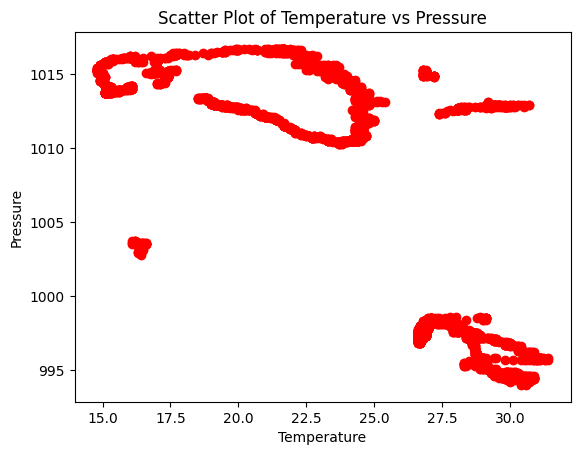

In [454]:
plt.scatter(X, y,color='red')
plt.title('Scatter Plot of Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [455]:
print(X.shape)
print(y.shape)

(2878, 1)
(2878,)


In [456]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=44 )

In [457]:
#X_test_reshaped= np.array(X_test).reshape(-1,1)


In [458]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2,include_bias=True)
X_train_p=pol.fit_transform(X_train)
X_test_p=pol.fit_transform(X_test)

In [459]:
X_train_p


array([[  1.  ,  30.  , 900.  ],
       [  1.  ,  21.7 , 470.89],
       [  1.  ,  28.6 , 817.96],
       ...,
       [  1.  ,  22.7 , 515.29],
       [  1.  ,  28.6 , 817.96],
       [  1.  ,  26.6 , 707.56]])

In [460]:
X_test_p

array([[  1.  ,  28.  , 784.  ],
       [  1.  ,  27.4 , 750.76],
       [  1.  ,  29.  , 841.  ],
       ...,
       [  1.  ,  22.9 , 524.41],
       [  1.  ,  28.  , 784.  ],
       [  1.  ,  28.6 , 817.96]])

polynomial regression with degree 2 implemented

In [461]:
from sklearn.linear_model import LinearRegression
lin_reg1=LinearRegression()
lin_reg1.fit(X_train_p,y_train)
print(lin_reg1.coef_)
print(lin_reg1.intercept_)

[ 0.          3.83117604 -0.11219682]
981.5166962503728


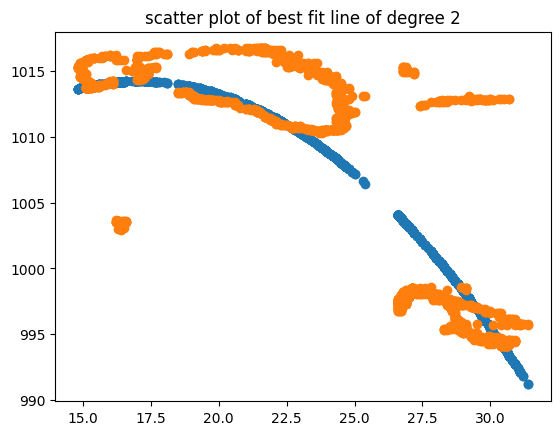

In [462]:
plt.scatter(X_train,lin_reg1.predict(X_train_p))
plt.scatter(X_train,y_train)
plt.title("scatter plot of best fit line of degree 2")
plt.show()

In [463]:
from sklearn.metrics import r2_score
y_predict1=lin_reg1.predict(X_test_p)
score1=r2_score(y_test,y_predict1)
score1

0.5837708612084538

MSE of model 1 with degree 2


In [464]:
mse1=sum((y_predict1-y_test)**2)/1266
mse1

28.752936507144916

mae of model 1 with degree of 2

In [465]:
mae1=sum(abs(y_predict1-y_test))/1266
mae1

3.829961526359636

polynomial regression of degree 3 implementation

In [466]:
pol=PolynomialFeatures(degree=3,include_bias=True)
X_train_p=pol.fit_transform(X_train)
X_test_p=pol.fit_transform(X_test)

In [467]:
X_train_p

array([[1.0000000e+00, 3.0000000e+01, 9.0000000e+02, 2.7000000e+04],
       [1.0000000e+00, 2.1700000e+01, 4.7089000e+02, 1.0218313e+04],
       [1.0000000e+00, 2.8600000e+01, 8.1796000e+02, 2.3393656e+04],
       ...,
       [1.0000000e+00, 2.2700000e+01, 5.1529000e+02, 1.1697083e+04],
       [1.0000000e+00, 2.8600000e+01, 8.1796000e+02, 2.3393656e+04],
       [1.0000000e+00, 2.6600000e+01, 7.0756000e+02, 1.8821096e+04]])

In [468]:
X_test_p

array([[1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04],
       [1.0000000e+00, 2.7400000e+01, 7.5076000e+02, 2.0570824e+04],
       [1.0000000e+00, 2.9000000e+01, 8.4100000e+02, 2.4389000e+04],
       ...,
       [1.0000000e+00, 2.2900000e+01, 5.2441000e+02, 1.2008989e+04],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04],
       [1.0000000e+00, 2.8600000e+01, 8.1796000e+02, 2.3393656e+04]])

In [469]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_train_p,y_train)
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[ 0.00000000e+00  2.70397823e+01 -1.14911236e+00  1.50193043e-02]
813.959169699261


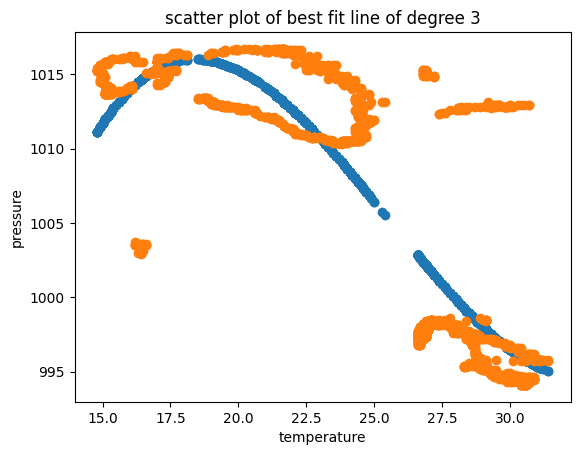

In [470]:
plt.scatter(X_train,lin_reg2.predict(X_train_p))
plt.scatter(X_train,y_train)
plt.xlabel('temperature')
plt.ylabel('pressure')

plt.title("scatter plot of best fit line of degree 3")
plt.show()

In [471]:
y_predict2=lin_reg2.predict(X_test_p)
score2=r2_score(y_test,y_predict2)
score2

0.6000431907310297

MSE of model 2 with degree 3

In [472]:
mse2=sum((y_predict2-y_test)**2)/1266
mse2

27.62885072366429

mae of model 1 with degree of 3

In [473]:
mae2=sum(abs(y_predict2-y_test))/1266
mae2

3.8585174405725318

train test split 70:30

In [474]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44 )

In [475]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=4,include_bias=True)
X_train_p=pol.fit_transform(X_train)
X_test_p=pol.fit_transform(X_test)

In [476]:
X_train_p

array([[1.00000000e+00, 2.85000000e+01, 8.12250000e+02, 2.31491250e+04,
        6.59750062e+05],
       [1.00000000e+00, 2.42000000e+01, 5.85640000e+02, 1.41724880e+04,
        3.42974210e+05],
       [1.00000000e+00, 1.51000000e+01, 2.28010000e+02, 3.44295100e+03,
        5.19885601e+04],
       ...,
       [1.00000000e+00, 2.27000000e+01, 5.15290000e+02, 1.16970830e+04,
        2.65523784e+05],
       [1.00000000e+00, 2.86000000e+01, 8.17960000e+02, 2.33936560e+04,
        6.69058562e+05],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, 1.88210960e+04,
        5.00641154e+05]])

In [477]:
X_test_p

array([[1.00000000e+00, 2.80000000e+01, 7.84000000e+02, 2.19520000e+04,
        6.14656000e+05],
       [1.00000000e+00, 2.74000000e+01, 7.50760000e+02, 2.05708240e+04,
        5.63640578e+05],
       [1.00000000e+00, 2.90000000e+01, 8.41000000e+02, 2.43890000e+04,
        7.07281000e+05],
       ...,
       [1.00000000e+00, 2.04000000e+01, 4.16160000e+02, 8.48966400e+03,
        1.73189146e+05],
       [1.00000000e+00, 2.91000000e+01, 8.46810000e+02, 2.46421710e+04,
        7.17087176e+05],
       [1.00000000e+00, 2.14000000e+01, 4.57960000e+02, 9.80034400e+03,
        2.09727362e+05]])

coefficient and intercept calculation

In [478]:
lin_reg3=LinearRegression()
lin_reg3.fit(X_train_p,y_train)
print(lin_reg3.coef_)
print(lin_reg3.intercept_)

[ 0.00000000e+00 -1.95604593e+02  1.39232065e+01 -4.29136972e-01
  4.81550801e-03]
2020.0257635005983


VISUALISING BEST FIT OF POLYNOMIAL REGRESSION OF DEGREE 4

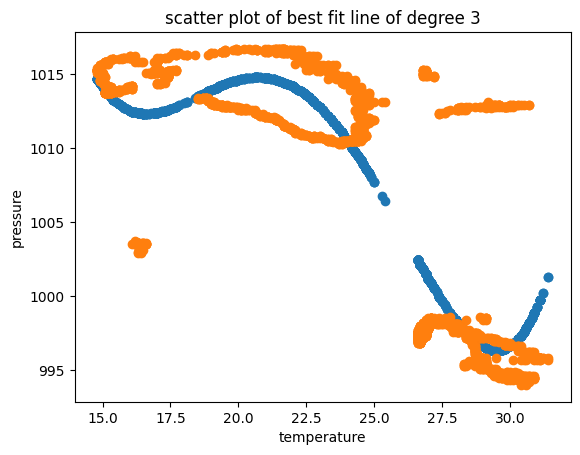

In [479]:
plt.scatter(X_train,lin_reg3.predict(X_train_p))
plt.scatter(X_train,y_train)
plt.xlabel('temperature')
plt.ylabel('pressure')

plt.title("scatter plot of best fit line of degree 3")
plt.show()

In [481]:
y_predict3=lin_reg3.predict(X_test_p)
score3=r2_score(y_test,y_predict3)
score3

0.6120593872404212

mse of polynomial regression for degree 4

In [482]:
mse3=sum((y_predict3-y_test)**2)/863
mse3

26.71089641691194

mae of polynomial regression of degree 4

In [485]:
mae3=sum(abs(y_predict3-y_test))/863
mae3

3.446870925916599

polynomial regression  model of degree 5


In [492]:
pol=PolynomialFeatures(degree=5,include_bias=True)
X_train_p=pol.fit_transform(X_train)
X_test_p=pol.fit_transform(X_test)


In [493]:
X_train_p

array([[1.00000000e+00, 2.85000000e+01, 8.12250000e+02, 2.31491250e+04,
        6.59750062e+05, 1.88028768e+07],
       [1.00000000e+00, 2.42000000e+01, 5.85640000e+02, 1.41724880e+04,
        3.42974210e+05, 8.29997587e+06],
       [1.00000000e+00, 1.51000000e+01, 2.28010000e+02, 3.44295100e+03,
        5.19885601e+04, 7.85027258e+05],
       ...,
       [1.00000000e+00, 2.27000000e+01, 5.15290000e+02, 1.16970830e+04,
        2.65523784e+05, 6.02738990e+06],
       [1.00000000e+00, 2.86000000e+01, 8.17960000e+02, 2.33936560e+04,
        6.69058562e+05, 1.91350749e+07],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, 1.88210960e+04,
        5.00641154e+05, 1.33170547e+07]])

In [494]:
X_test_p

array([[1.00000000e+00, 2.80000000e+01, 7.84000000e+02, 2.19520000e+04,
        6.14656000e+05, 1.72103680e+07],
       [1.00000000e+00, 2.74000000e+01, 7.50760000e+02, 2.05708240e+04,
        5.63640578e+05, 1.54437518e+07],
       [1.00000000e+00, 2.90000000e+01, 8.41000000e+02, 2.43890000e+04,
        7.07281000e+05, 2.05111490e+07],
       ...,
       [1.00000000e+00, 2.04000000e+01, 4.16160000e+02, 8.48966400e+03,
        1.73189146e+05, 3.53305857e+06],
       [1.00000000e+00, 2.91000000e+01, 8.46810000e+02, 2.46421710e+04,
        7.17087176e+05, 2.08672368e+07],
       [1.00000000e+00, 2.14000000e+01, 4.57960000e+02, 9.80034400e+03,
        2.09727362e+05, 4.48816554e+06]])

In [495]:
lin_reg4=LinearRegression()
lin_reg4.fit(X_train_p,y_train)
print(lin_reg4.coef_)
print(lin_reg4.intercept_)

[ 0.00000000e+00 -1.05356582e+03  9.20888707e+01 -3.93212198e+00
  8.20907228e-02 -6.71850798e-04]
5724.065269159502


VISUALISING BEST FIT OF POLYNOMIAL REGRESSION OF DEGREE 5

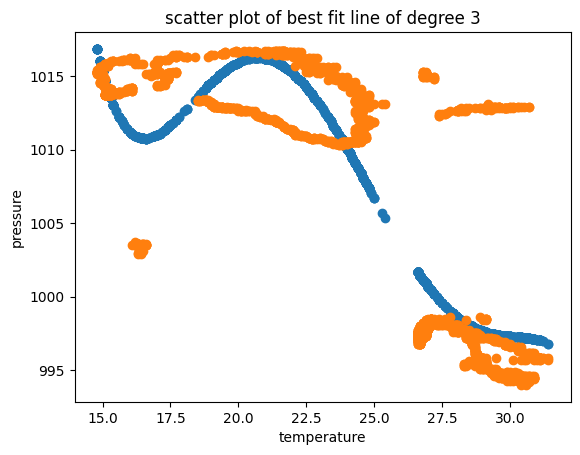

In [496]:
plt.scatter(X_train,lin_reg4.predict(X_train_p))
plt.scatter(X_train,y_train)
plt.xlabel('temperature')
plt.ylabel('pressure')

plt.title("scatter plot of best fit line of degree 3")
plt.show()

In [497]:
y_predict4=lin_reg4.predict(X_test_p)
score4=r2_score(y_test,y_predict4)
score4

0.6311054959264424

mse calculated for polynomial regression

In [498]:
mse4=sum((y_predict4-y_test)**2)/863
mse4

25.399513644588268

mean absolute error for polynomial regression of degree 5

In [499]:
mae4=sum(abs(y_predict4-y_test))/863
mae4

3.552962917361423

training and spliting of data 80:20

In [ ]:
X_train